# Data Analyst Skills Analysis: EDA & Visualisation

## 0.1 Project goals and objectives

**Goal:**  
To identify the most in-demand skills for data analyst and junior data analyst roles and compare skill requirements across experience levels and countries, using job posting data from the JSearch API processed in the previous notebook.

**Key objectives:**
- Load and inspect the processed dataset from the cleaning step;
- Examine the composition of the sample by country, experience level, employment type, and remote status;
- Analyse the skill demand (top skills, skills by category, skills by country, average skills per posting);
- Compare skill requirements between junior and middle+ roles;
- Summarize findings and provide data-driven recommendations.

## 0.2 Data description

The analysis uses the **jsearch_cleaned_with_skills.csv** dataset produced in the previous notebook.

- **Roles:** data analyst, junior data analyst
- **Markets:** USA, UK, Canada
- **Period:** 18 Jan – 17 Feb 2026

Main columns:

- **id** — unique job identifier from the API;
- **title** — job title;
- **description** — full job description text;
- **employer_name** — company name;
- **employer_website** — company website (if available);
- **publisher** — job board or source where the posting was found;
- **employment_type** — type of employment (e.g. Full-time, Part-time, Contractor);
- **is_remote** — Boolean flag indicating whether the role is remote;
- **is_full_time, is_part_time, is_contractor, is_internship** — binary flags derived from employment_type;
- **apply_link** — application URL;
- **city, state, country** — location information parsed by the API;
- **latitude, longitude** — geographic coordinates (where available);
- **country_code, country_name** — country metadata based on the search configuration;
- **posted_at_datetime_utc** — publication date and time in UTC;
- **min_salary, max_salary, salary_period** — salary information where available;
- **highlights** — structured highlights from the API (e.g. Qualifications, Responsibilities);
- **qualifications_text, responsibilities_text** — extracted text from highlights;
- **text_for_skills** — concatenated text used for skill extraction;
- **search_role** — search query used when fetching the job (data analyst or junior data analyst);
- **data_source** — source tag (here, always jsearch);
- **experience_group** — derived seniority (junior or mid_plus);
- **skill_*** (43 columns)** — binary indicators (0/1) for skills extracted from job descriptions, qualifications, and responsibilities.

## 0.3 Project structure

- [1. Data loading and overview](#1-data-loading-and-overview)
- [2. Sample structure and breakdown](#2-sample-structure-and-breakdown)
- [3. Skill demand analysis](#3-skill-demand-analysis)
- [4. Segment analysis: junior vs middle+](#4-segment-analysis-junior-vs-mid)
- [5. Final conclusions and recommendations](#5-final-conclusions-and-recommendations)

<a id="1-data-loading-and-overview"></a>

## 1. Data loading and overview

Here we load the cleaned dataset with extracted skills and verify its structure and data types for the analysis that follows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/processed/jsearch_cleaned_with_skills.csv')

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1138 non-null   str    
 1   title                     1138 non-null   str    
 2   description               1138 non-null   str    
 3   employer_name             1138 non-null   str    
 4   employer_website          838 non-null    str    
 5   publisher                 1138 non-null   str    
 6   employment_type           1119 non-null   str    
 7   is_remote                 1138 non-null   bool   
 8   apply_link                1138 non-null   str    
 9   city                      872 non-null    str    
 10  state                     843 non-null    str    
 11  country                   1105 non-null   str    
 12  latitude                  1105 non-null   float64
 13  longitude                 1105 non-null   float64
 14  posted_at_datetime_

In [4]:
df['posted_at_datetime_utc'] = pd.to_datetime(df['posted_at_datetime_utc'])

The dataset structure matches expectations: 1,138 rows, 74 columns including the skill indicators. The `posted_at_datetime_utc` column was converted to datetime.

<a id="2-sample-structure-and-breakdown"></a>

## 2. Sample structure and breakdown

Here we examine how job postings are distributed by country, experience level, employment type, and remote status, and by publication date. This sets the context for the skill analysis that follows.

In [5]:
job_postings_agg = df['country_name'].value_counts().reset_index()
experience_agg = df['experience_group'].value_counts().reset_index()
employment_type_agg = df[['is_full_time', 'is_part_time', 'is_contractor','is_internship']].sum().reset_index()
employment_type_agg.columns = ['employment_type', 'count']
is_remote_agg = df['is_remote'].value_counts().reset_index()

In [6]:
job_postings_agg['share'] = job_postings_agg['count'] / job_postings_agg['count'].sum()
job_postings_agg

,country_name,count,share
0,USA,683,0.600176
1,United Kingdom,250,0.219684
2,Canada,205,0.180141


In [7]:
experience_agg['share'] = experience_agg['count'] / experience_agg['count'].sum()
experience_agg

,experience_group,count,share
0,mid_plus,852,0.748682
1,junior,286,0.251318


In [8]:
employment_type_agg['share'] = employment_type_agg['count'] / employment_type_agg['count'].sum()
employment_type_agg

,employment_type,count,share
0,is_full_time,994,0.853219
1,is_part_time,46,0.039485
2,is_contractor,92,0.078970
3,is_internship,33,0.028326


In [9]:
is_remote_agg['share'] = is_remote_agg['count'] / is_remote_agg['count'].sum()
is_remote_agg

,is_remote,count,share
0,False,995,0.874341
1,True,143,0.125659


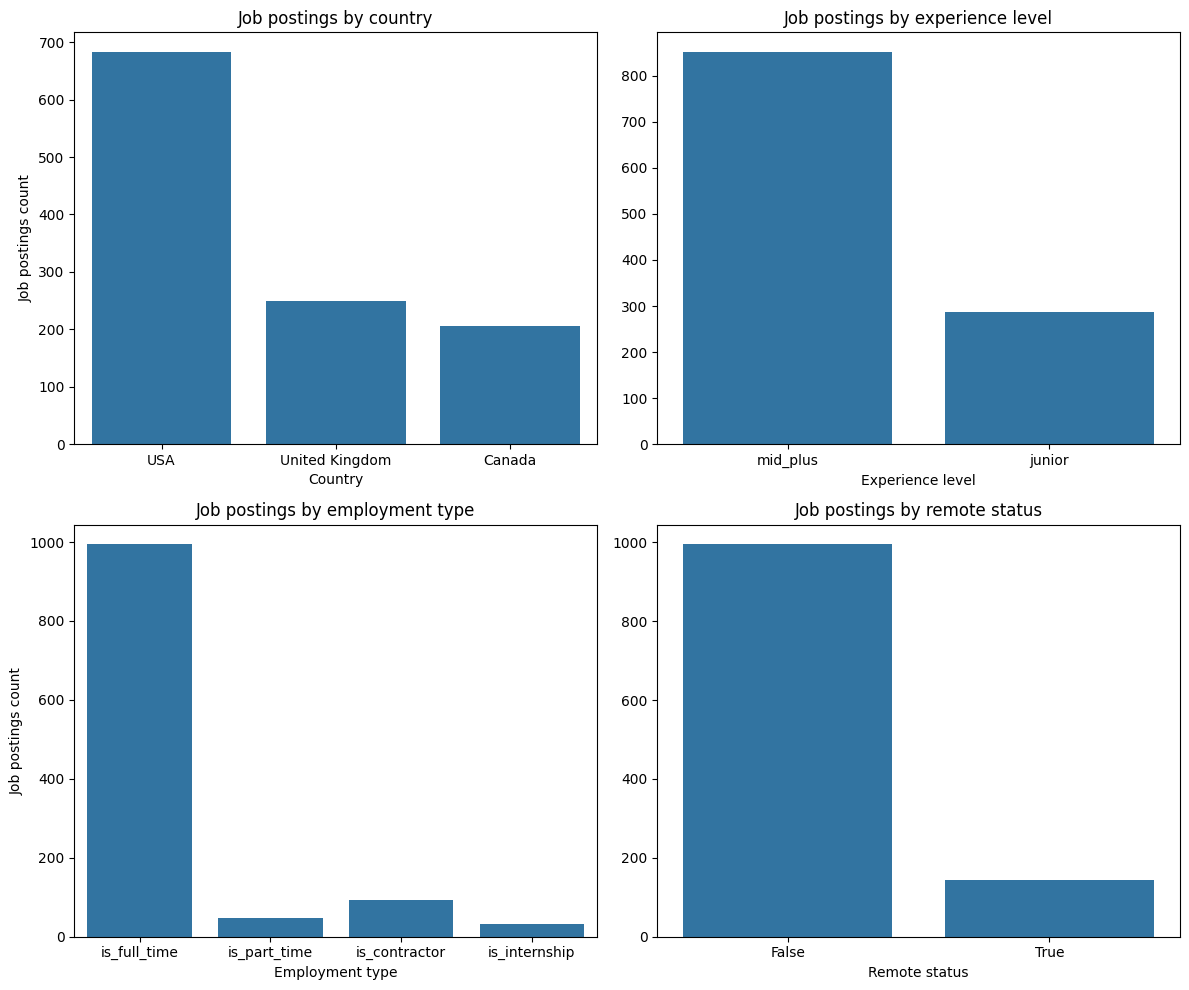

In [10]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(
    data=job_postings_agg,
    x='country_name',
    y='count')

plt.title('Job postings by country')
plt.xlabel('Country')
plt.ylabel('Job postings count')

plt.subplot(2, 2, 2)
sns.barplot(
    data=experience_agg,
    x='experience_group',
    y='count')

plt.title('Job postings by experience level')
plt.xlabel('Experience level')
plt.ylabel('')

plt.subplot(2, 2, 3)
sns.barplot(
    data=employment_type_agg,
    x='employment_type',
    y='count')

plt.title('Job postings by employment type')
plt.xlabel('Employment type')
plt.ylabel('Job postings count')

plt.subplot(2, 2, 4)
sns.barplot(
    data=is_remote_agg,
    x='is_remote',
    y='count')

plt.title('Job postings by remote status')
plt.xlabel('Remote status')
plt.ylabel('')

plt.tight_layout()
plt.show()

The sample of 1,138 data analyst job postings is concentrated in the USA (60%), with the UK (22%) and Canada (18%) contributing the rest, and is clearly tilted toward mid+ roles (75%) over junior roles (25%). Full-time positions dominate (about 87%), with a smaller share of contractor (8%), part-time (4%), and internship (3%) roles, and only about 13% of postings are explicitly remote. Conclusions will be most applicable to these segments.

Next, we look at the distribution of job postings by publication date:

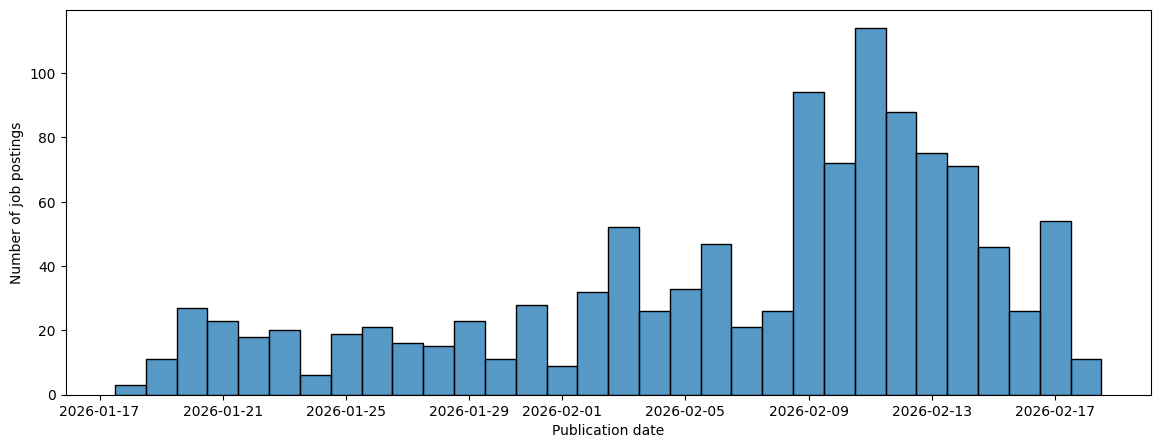

In [11]:
plt.figure(figsize=(14, 5))

sns.histplot(df['posted_at_datetime_utc'], discrete=True)
plt.xlabel('Publication date')
plt.ylabel('Number of job postings')

plt.show() 

Job posting volume is low and relatively stable in late January and early February (typically under 40 postings per day), then rises in mid-February, with a peak around February 11 (over 100 postings). After that peak, activity declines somewhat but stays clearly above early-period levels, suggesting stronger hiring activity in the second half of the month, possibly linked to seasonal patterns.

<a id="3-skill-demand-analysis"></a>

## 3. Skill demand analysis

Here we analyse which skills are most frequently mentioned across job postings: overall, by country, and by skill category. We also examine how many skills are typically listed per posting.

### 3.1 Top 20 skills overall

Here we rank all skills by both count and the share of job postings mentioning each skill.

In [12]:
skill_cols = [col for col in df.columns if col.startswith("skill_")]

top_skills = df[skill_cols].agg(['sum', 'mean']).T.reset_index()
top_skills.columns = ['skill_name', 'count', 'share']
top_skills['share'] = top_skills['share'] * 100
top_skills = top_skills.sort_values(by='count', ascending=False).head(20)
top_skills

,skill_name,count,share
0,skill_sql,628.0,55.184534
1,skill_python,413.0,36.291740
3,skill_excel,409.0,35.940246
41,skill_dashboards,394.0,34.622144
16,skill_power_bi,357.0,31.370826
34,skill_statistics,316.0,27.768014
17,skill_tableau,288.0,25.307557
42,skill_data_visualization,266.0,23.374341
2,skill_r,195.0,17.135325
40,skill_data_pipeline,122.0,10.720562


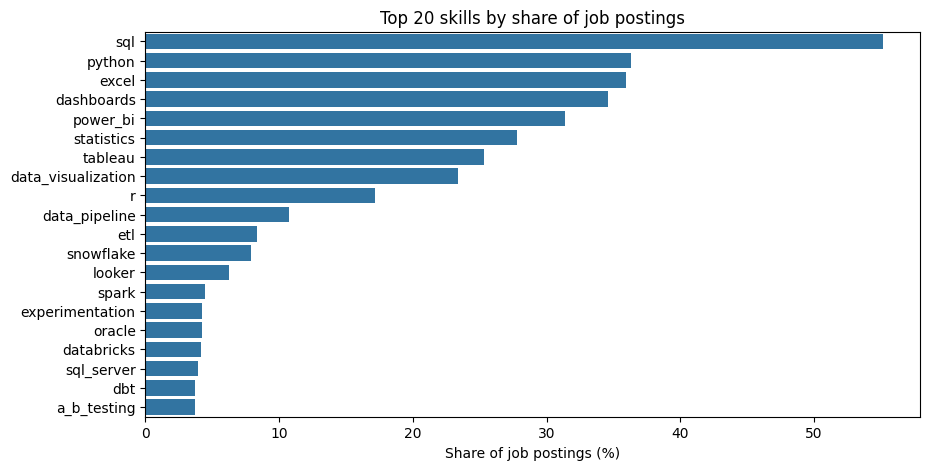

In [13]:
top_skills["skill"] = top_skills["skill_name"].str.replace("skill_", "")

plt.figure(figsize=(10,5))

sns.barplot(
    data=top_skills,
    x='share',
    y='skill')

plt.title('Top 20 skills by share of job postings')
plt.xlabel('Share of job postings (%)')
plt.ylabel('')
plt.show()

**SQL** is the most requested skill, appearing in about 55% of postings, with **Python** and **Excel** both around 36%. **BI and visualization** skills are common: dashboards (~35%), Power BI (~31%), Tableau (~25%), and data visualization (~23%). Statistics appears in roughly 28% of postings. R appears in about 17%. Data pipeline and ETL skills show up in ~11% and ~8% of postings. Cloud and analytics engineering tools (Snowflake, Databricks, dbt) are less frequent (about 4-8% each) but still present.

This profile matches what is widely seen in data analyst job markets. The share of pipeline and cloud-warehouse skills indicates that many analyst roles are moving toward analytics engineering rather than traditional reporting only.

### 3.2 Top 20 skills by country

Here we count how many job postings mention each skill in each country:

In [14]:
df.groupby('country_name')[skill_cols].sum().T.sort_values(by='USA', ascending=False)

country_name,Canada,USA,United Kingdom
skill_sql,123,368,137
skill_excel,48,269,92
skill_dashboards,60,244,90
skill_python,81,241,91
skill_power_bi,53,220,84
skill_statistics,57,217,42
skill_tableau,44,193,51
skill_data_visualization,35,191,40
skill_r,33,128,34
skill_data_pipeline,31,68,23


Because sample sizes differ across countries (USA dominates), we calculate the *share* of job postings mentioning each skill within each country for a fair comparison:

In [15]:
top_skills_by_country = df.groupby("country_name")[skill_cols].mean() * 100
top_skills_by_country = top_skills_by_country.T.sort_values(by='USA', ascending=False).reset_index()
top_skills_by_country.columns = ['skill_name', 'Canada', 'USA', 'United Kingdom']
top_skills_by_country

,skill_name,Canada,USA,United Kingdom
0,skill_sql,60.000000,53.879941,54.8
1,skill_excel,23.414634,39.385066,36.8
2,skill_dashboards,29.268293,35.724744,36.0
3,skill_python,39.512195,35.285505,36.4
4,skill_power_bi,25.853659,32.210835,33.6
5,skill_statistics,27.804878,31.771596,16.8
6,skill_tableau,21.463415,28.257687,20.4
7,skill_data_visualization,17.073171,27.964861,16.0
8,skill_r,16.097561,18.740849,13.6
9,skill_data_pipeline,15.121951,9.956076,9.2


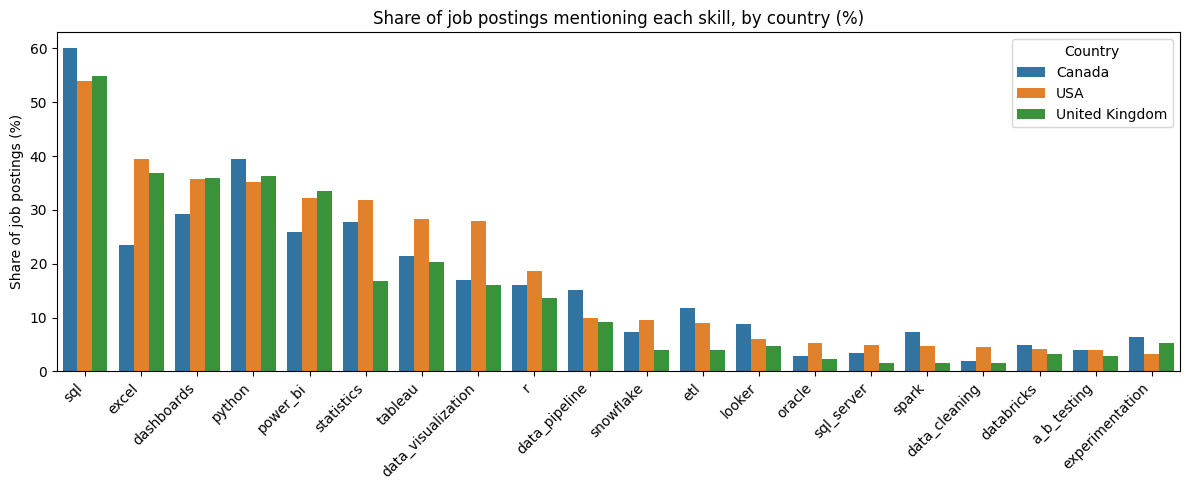

In [16]:
skill_long = top_skills_by_country.head(20).melt(
    id_vars="skill_name",
    value_vars=["Canada", "USA", "United Kingdom"],
    var_name="country",
    value_name="skill_share"
)

skill_long["skill"] = skill_long["skill_name"].str.replace("skill_", "")

plt.figure(figsize=(12, 5))
sns.barplot(
    data=skill_long,
    x="skill",
    y="skill_share",
    hue="country"
)
plt.title("Share of job postings mentioning each skill, by country (%)")
plt.xlabel("")
plt.ylabel("Share of job postings (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

Skill demand is broadly similar across the three countries: **SQL** appears in 54–60% of postings, **Python** in 35–40%, **Excel** in 23-29%, and core **BI tools** (dashboards, Power BI, Tableau) in 20–36%.

- Statistics is more common in the USA (32%) and Canada (28%) than in the UK (17%);
- Data pipeline, ETL, dbt, and Snowflake are more prominent in Canada (about 10–15% for pipelines and ETL, 6% for dbt) than in the USA and UK, where they sit around 4–10%;
- Canada has higher shares for BigQuery and Looker; the USA leads on Tableau.

Overall, the same core stack (SQL, Python, Excel, BI tools) dominates across markets, with some regional variation.

### 3.3 Top 20 skills by category 

Here we group individual skills into broader categories (e.g. Programming, Spreadsheets, BI tools) and compute the share of postings that mention at least one skill in each category:

In [17]:
SKILL_CATEGORIES = {
    "Programming": ["sql", "python", "r"],
    "Spreadsheets": ["excel", "google_sheets"],
    "Databases": ["postgresql", "mysql", "oracle", "sql_server", "bigquery",
                   "snowflake", "redshift", "vertica", "clickhouse",
                   "databricks", "synapse"],
    "Visualisation & BI Tools": ["dashboards", "data_visualization", "power_bi", "tableau", "looker", "qlik", "datalens", "superset"],
    "Data Engineering": ["airflow", "hadoop", "spark", "kafka", "dbt",
                         "talend", "informatica", "etl", "data_pipeline"],
    "AI/ML Tools": ["chatgpt", "claude", "cursor", "copilot", "gemini"],
    "Statistics": ["statistics", "a_b_testing", "experimentation",
                  "hypothesis_testing", "data_cleaning"]
}

In [18]:
category_share = {}

for category, skills in SKILL_CATEGORIES.items():
    cols = [f"skill_{s}" for s in skills if f"skill_{s}" in df.columns]
    category_share[category] = (df[cols].max(axis=1).mean()) * 100

top_skills_by_category = pd.Series(category_share).sort_values(ascending=False).reset_index()
top_skills_by_category.columns = ['skill_category', 'share']
top_skills_by_category

,skill_category,share
0,Programming,62.038664
1,Visualisation & BI Tools,56.239016
2,Spreadsheets,36.379613
3,Statistics,30.667838
4,Data Engineering,21.089631
5,Databases,18.014060
6,AI/ML Tools,0.527241


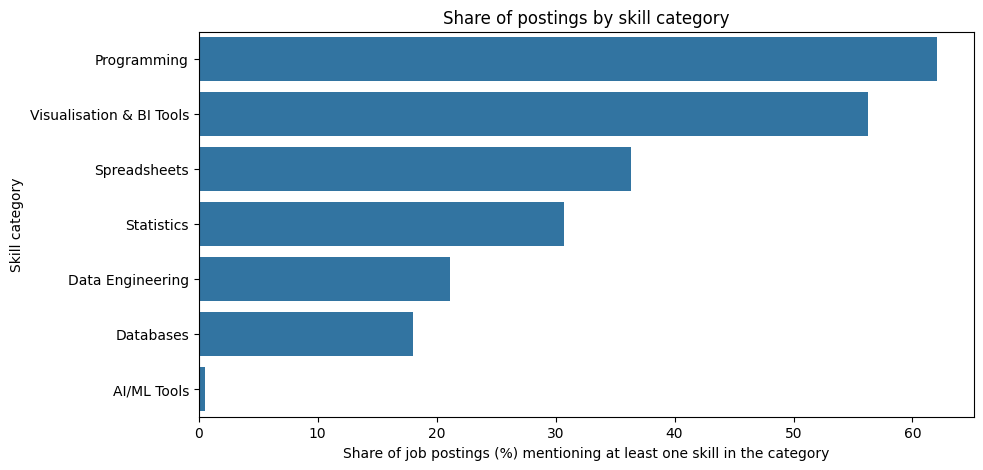

In [19]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=top_skills_by_category,
    x='share',
    y='skill_category')

plt.title('Share of postings by skill category')
plt.xlabel('Share of job postings (%) mentioning at least one skill in the category')
plt.ylabel('Skill category')
plt.show()

Programming leads (62%), followed by Visualisation & BI Tools (56%), Spreadsheets(36%), Statistics (31%), Data Engineering (21%), and Databases (18%). AI/ML Tools appears in only about 0.5% of postings.

The pattern fits a standard data analyst role: emphasis on programming (SQL, Python, R), BI tools, and spreadsheets, with growing overlap with data engineering. 

### 3.4 Average number of skills per posting

We examine how many skills job postings typically list and how that varies across the sample:

In [20]:
skills_count = df[skill_cols].sum(axis=1)
skills_count.describe()

count    1138.000000
mean        3.695079
std         3.147390
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        16.000000
dtype: float64

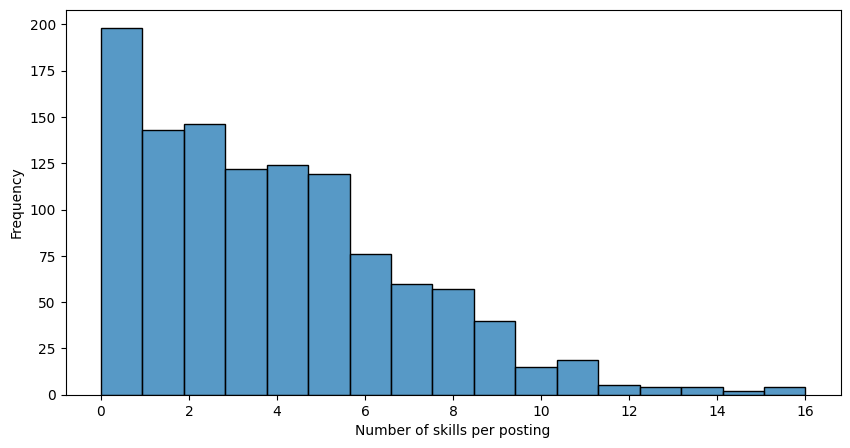

In [21]:
plt.figure(figsize=(10, 5))

sns.histplot(skills_count)
plt.xlabel('Number of skills per posting')
plt.ylabel('Frequency')

plt.show() 

Most postings mention around 3 skills (median = 3, mean ~ 3.7), with typical listings in the 1-6 skill range. The mean above the median indicates a right skew from a minority of postings listing many skills. 
 
 Overall, hiring appears to focus on a small set of core skills rather than long lists.

<a id="4-segment-analysis-junior-vs-mid"></a>

## 4. Segment analysis: junior vs middle+

Here we compare skill requirements between junior and middle+ roles to identify differences in expectations by experience level.

As a reminder: `experience_group` is derived from job titles. Junior includes titles that mention junior, jr, entry-level, graduate, intern, or trainee. Mid+ covers all other roles — that is, any posting whose title does not include those keywords, so it can include mid-level, senior, lead, principal, and generic “Data Analyst” roles without explicit seniority wording.

### 4.1 Top skills: junior vs middle+

Here we compute the share of junior and middle+ postings that mention each skill and compare the two groups.

In [22]:
top_skills_by_experience = df.groupby("experience_group")[skill_cols].mean() * 100
top_skills_by_experience = top_skills_by_experience.T.reset_index()
top_skills_by_experience.columns = ['skill_name', 'junior_share', 'mid_plus_share']
top_skills_by_experience = top_skills_by_experience.sort_values(by='mid_plus_share', ascending=False)
top_skills_by_experience

,skill_name,junior_share,mid_plus_share
0,skill_sql,50.699301,56.690141
41,skill_dashboards,29.720280,36.267606
1,skill_python,42.307692,34.272300
3,skill_excel,44.405594,33.098592
16,skill_power_bi,33.916084,30.516432
34,skill_statistics,32.167832,26.291080
17,skill_tableau,27.972028,24.413146
42,skill_data_visualization,27.972028,21.830986
2,skill_r,17.132867,17.136150
40,skill_data_pipeline,8.391608,11.502347


In [23]:
top_skills_by_experience_long = top_skills_by_experience.melt(
    id_vars="skill_name",
    value_vars=["junior_share", "mid_plus_share"],
    var_name="experience_group",
    value_name="share")

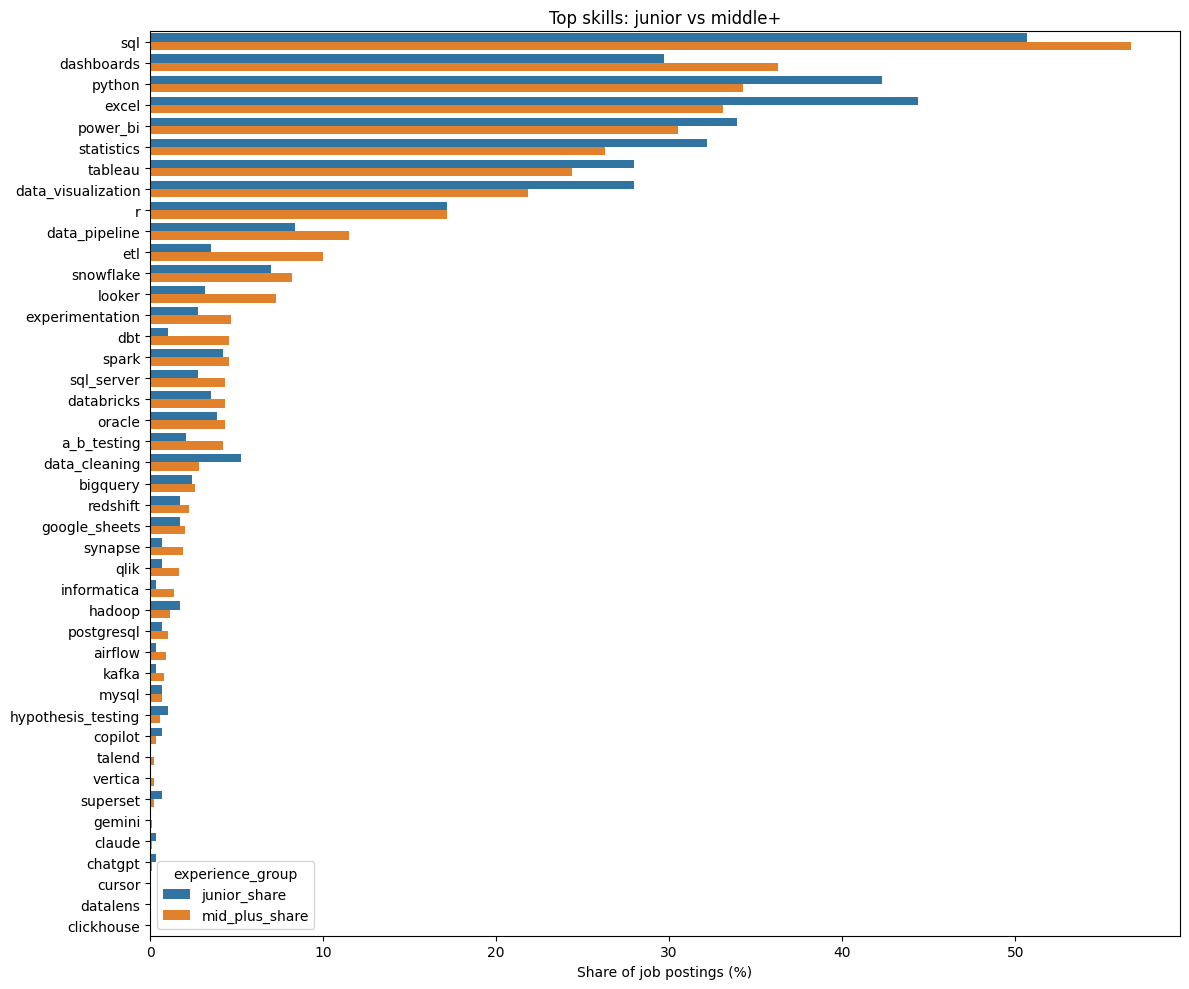

In [24]:
top_skills_by_experience_long["skill"] = top_skills_by_experience_long["skill_name"].str.replace("skill_", "")


plt.figure(figsize=(12,10))

sns.barplot(
    data=top_skills_by_experience_long,
    x='share',
    y='skill',
    hue='experience_group')

plt.title('Top skills: junior vs middle+')
plt.xlabel('Share of job postings (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Junior roles** emphasize **Excel** (44% vs 33%), **Python** (42% vs 34%), **statistics** (32% vs 26%), **Tableau**, **Power BI**, and **data visualization** more than middle+ roles. 

**Middle+ roles** show higher shares for **SQL** (57% vs 51%), **dashboards** (36% vs 30%), **data pipeline** (12% vs 8%), **ETL** (10% vs 3%), Looker (7% vs 3%), and dbt (5% vs 1%). R appears in similar shares (~17%) in both groups.

The pattern is consistent with different stages of the analyst role: junior positions focus on hands-on analysis, reporting, and visualization; middle+ positions add data pipelines, ETL, cloud warehouses (Snowflake, Databricks), and tools like dbt, shifting toward analytics engineering and infrastructure. This matches typical career paths in the field and can guide upskilling: juniors should add pipeline work and cloud tools to move toward mid-level expectations.

### 4.2 Skill categories: junior vs middle+

Next, we compare skill categories between junior and mid+:

In [25]:
records = []

for group in ["junior", "mid_plus"]:
    subset = df[df["experience_group"] == group]
    for category, skills in SKILL_CATEGORIES.items():
        cols = [f"skill_{s}" for s in skills if f"skill_{s}" in df.columns]
        share = subset[cols].max(axis=1).mean() * 100
        records.append({"experience_group": group, "category": category, "share": share})

top_categories_by_experience = pd.DataFrame(records)
top_categories_by_experience = top_categories_by_experience.sort_values(by='share', ascending=False)
top_categories_by_experience 

,experience_group,category,share
0,junior,Programming,63.286713
7,mid_plus,Programming,61.619718
10,mid_plus,Visualisation & BI Tools,56.572770
3,junior,Visualisation & BI Tools,55.244755
1,junior,Spreadsheets,44.755245
6,junior,Statistics,34.615385
8,mid_plus,Spreadsheets,33.568075
13,mid_plus,Statistics,29.342723
11,mid_plus,Data Engineering,23.239437
9,mid_plus,Databases,18.896714


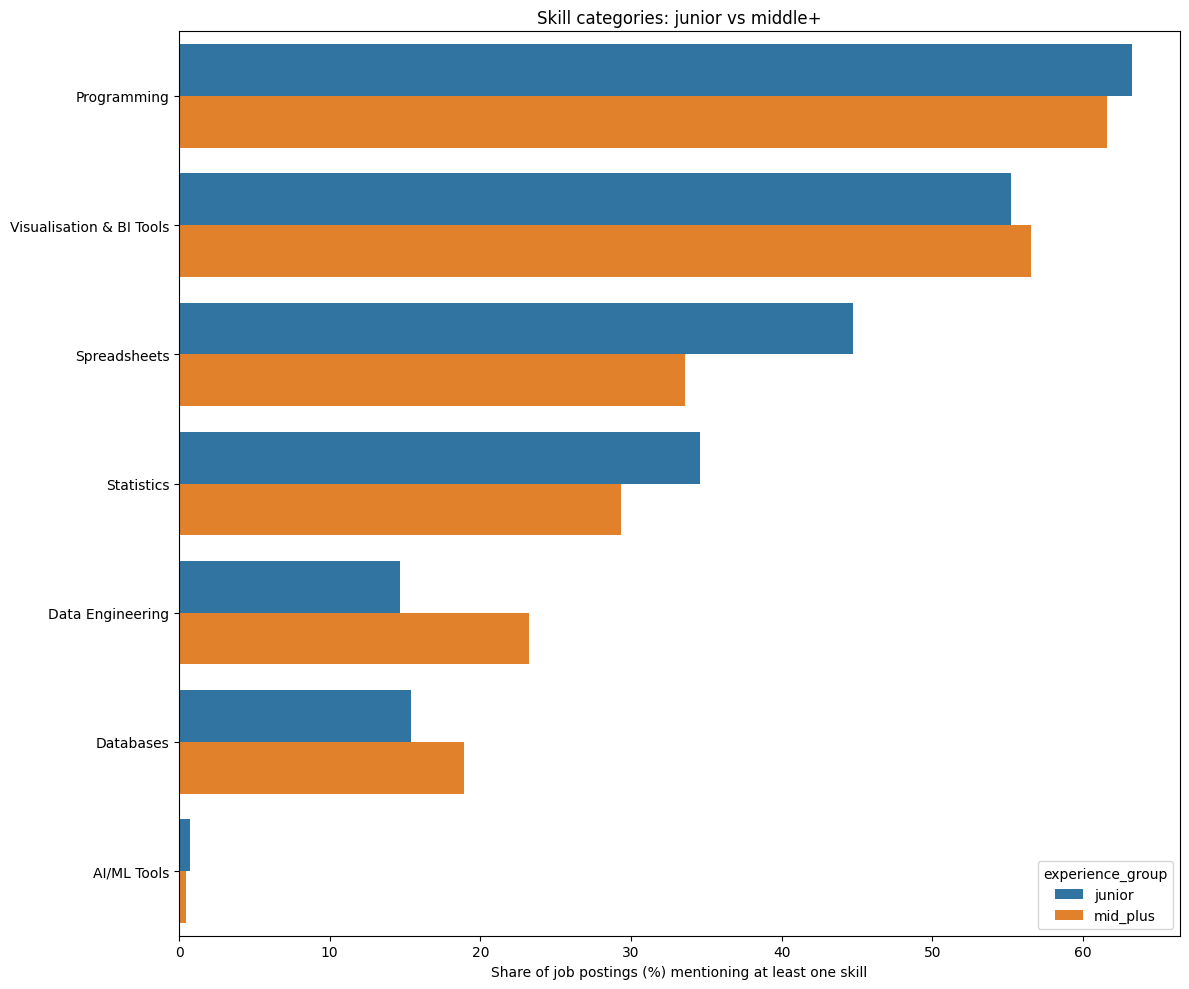

In [26]:
plt.figure(figsize=(12, 10))

sns.barplot(
    data=top_categories_by_experience,
    x="share",
    y="category",
    hue="experience_group")

plt.title("Skill categories: junior vs middle+")
plt.xlabel("Share of job postings (%) mentioning at least one skill")
plt.ylabel("")

plt.tight_layout()
plt.show()

**Programming** and **Visualisation & BI Tools** are similar across groups (junior 63% and 55%, middle+ 62% and 57%). 

**Junior roles** emphasize Spreadsheets (45% vs 34%) and Statistics (35% vs 29%), while **middle+ roles** emphasize Data Engineering (23% vs 15%) and Databases (19% vs 15%). AI/ML Tools appear in under 1% of both groups.

The pattern matches what we saw for individual skills: juniors focus more on spreadsheets and statistics for hands-on analysis and reporting, while middle+ roles lean more toward databases and data engineering. Programming and BI tools stay central at both levels.

### 4.3 Skills gap analysis

Here we quantify the gap between middle+ and junior: skills with a positive gap are more common in middle+ postings; skills with a negative gap are more common in junior postings.

In [27]:
gap_df = top_skills_by_experience.copy()
gap_df["gap"] = gap_df["mid_plus_share"] - gap_df["junior_share"]
gap_df = gap_df.sort_values(by="gap")
gap_df

,skill_name,junior_share,mid_plus_share,gap
3,skill_excel,44.405594,33.098592,-11.307003
1,skill_python,42.307692,34.272300,-8.035392
42,skill_data_visualization,27.972028,21.830986,-6.141042
34,skill_statistics,32.167832,26.291080,-5.876752
17,skill_tableau,27.972028,24.413146,-3.558882
16,skill_power_bi,33.916084,30.516432,-3.399652
39,skill_data_cleaning,5.244755,2.816901,-2.427854
23,skill_hadoop,1.748252,1.173709,-0.574543
21,skill_superset,0.699301,0.234742,-0.464559
37,skill_hypothesis_testing,1.048951,0.586854,-0.462097


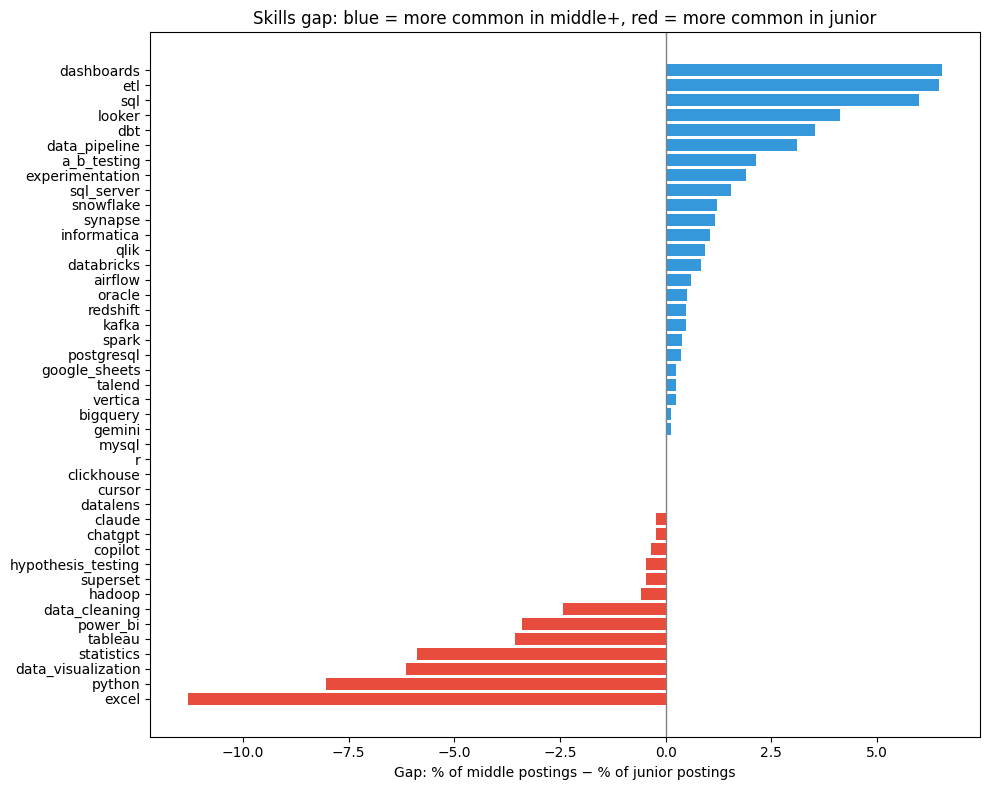

In [28]:
gap_df["skill"] = gap_df["skill_name"].str.replace("skill_", "")

colors = ["#e74c3c" if x < 0 else "#3498db" for x in gap_df["gap"]]

plt.figure(figsize=(10, 8))

plt.barh(gap_df["skill"], gap_df["gap"], color=colors)

plt.axvline(x=0, color="gray", linewidth=1)
plt.xlabel("Gap: % of middle postings − % of junior postings")
plt.title("Skills gap: blue = more common in middle+, red = more common in junior")

plt.tight_layout()
plt.show()

**Junior roles** favour Excel (−11 pp), Python (−8 pp), data visualization (−6 pp), and statistics (−6 pp), with Tableau and Power BI also more common among juniors. 

**Middle+ roles** favour dashboards (+6.5 pp), ETL (+6.5 pp), SQL (+6 pp), Looker (+4 pp), dbt (+3.5 pp), and data pipeline (+3 pp), as well as A/B testing, experimentation, and enterprise tools such as SQL Server, Snowflake, and Databricks.

These gaps match the earlier results: juniors focus on hands-on analysis and reporting tools, while middle+ roles add more data infrastructure, pipelines, and cloud/enterprise systems. For employers hiring middle+ analysts, these are the skills to expect beyond core Python, Excel, and BI tools.

### 4.4 Average skills count: junior vs middle+

We compare how many skills junior and middle+ postings typically list to see whether more experienced roles ask for a broader set of skills:

In [29]:
df["skills_count"] = df[skill_cols].sum(axis=1)

df.groupby("experience_group")["skills_count"].describe()

,count,mean,std,min,25%,50%,75%,max
experience_group,,,,,,,,
junior,286.0,3.685315,3.021373,0.0,1.0,3.0,6.0,13.0
mid_plus,852.0,3.698357,3.190298,0.0,1.0,3.0,5.0,16.0


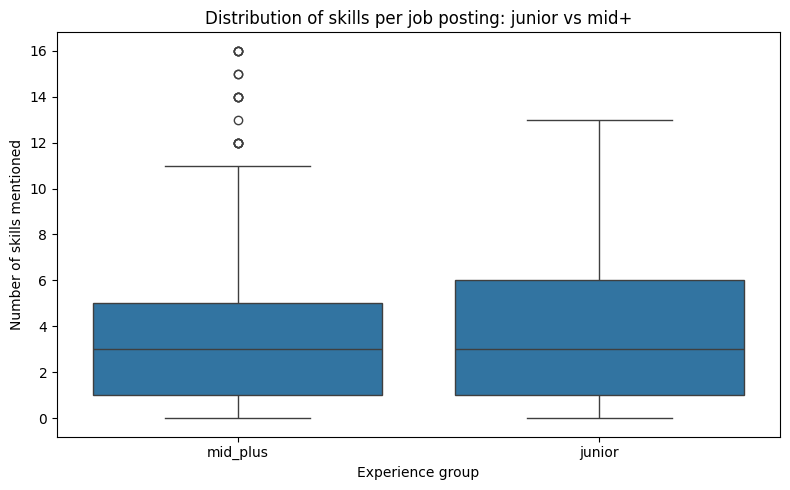

In [30]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x="experience_group", y="skills_count")

plt.xlabel("Experience group")
plt.ylabel("Number of skills mentioned")
plt.title("Distribution of skills per job posting: junior vs mid+")

plt.tight_layout()
plt.show()

Junior and middle+ postings list a very similar number of skills per posting (mean ≈3.7 for both, median 3), with comparable spreads (IQR 1–6 for junior, 1–5 for middle+). 

The main difference is that middle+ postings occasionally list many more skills (max 16 vs 13 for junior).

## 5. Final conclusions and recommendations

We analysed 1,138 data analyst and junior data analyst job postings from the USA, UK, and Canada (18 Jan-17 Feb 2026). The goal was to identify the most in-demand skills and compare requirements across experience levels and countries.

### 5.1 Key patterns in skill demand

- **Core skill set.** SQL appears in ~55% of postings, followed by Python and Excel (~36% each). BI tools (dashboards, Power BI, Tableau, data visualisation) are requested in 20–36% of postings, and statistics in ~28%. Programming (62%) and Visualisation & BI Tools (56%) are the leading skill categories; Spreadsheets (36%) and Statistics (31%) follow; Data Engineering and Databases are less frequent (~18–21%).

- **Junior vs middle+ roles.** Junior roles emphasise Excel, Python, statistics, Tableau, data visualisation, and data cleaning. Middle+ roles emphasise SQL, dashboards, ETL, data pipelines, dbt, Looker, Snowflake, and Databricks. Programming and BI tools are central at both levels; middle+ roles add more data engineering and infrastructure skills.

- **Skills per posting.** Postings typically mention around 3-4 skills (median 3, mean ~3.7), with little variation between junior and middle+ roles.

- **Geographic variation.** The core stack (SQL, Python, Excel, BI tools) is similar across the USA, UK, and Canada. Canada shows higher shares for data pipelines, ETL, dbt, BigQuery, and Looker. The UK has a lower share for statistics and higher for dbt. The USA leads on Excel, Tableau, and data visualisation.


### 5.2 Recommendations

- **Prioritise the core stack.** SQL, Python, Excel, and at least one BI tool (Power BI or Tableau) form the baseline for most roles. Candidates should master these before investing heavily in niche tools.

- **Plan skill progression for mid-level roles.** Juniors aiming for middle+ positions should add data pipelines, ETL, and cloud/warehouse tools (Snowflake, Databricks, dbt). The shift from hands-on analysis to data engineering and infrastructure is clear in the data.